In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import metrics
import math

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("churn.csv")

In [3]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
data.describe(include='all')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
data.groupby(by="Churn").count()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
1,483,483,483,483,483,483,483,483,483,483


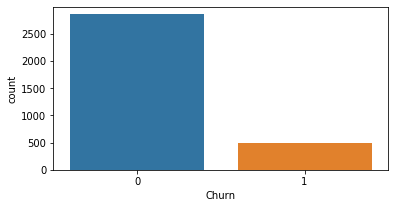

In [8]:
plt.figure(figsize=(6,3))
sb.countplot(x='Churn',data=data)
plt.show()

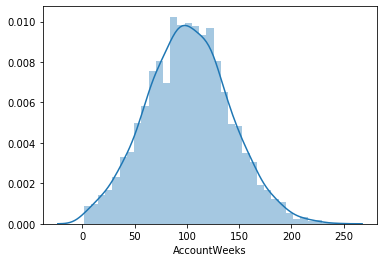

In [9]:
sb.distplot(data['AccountWeeks'])

In [10]:
#Checking for duplicate values
dupes = data.duplicated()
sum(dupes)

0

In [11]:
num_test_data = int(math.ceil(0.1*len(data)))
num_test_data

334

In [13]:
num_train_data = len(data) - num_test_data
num_train_data

2999

In [21]:
X = np.array(data.drop(['Churn'],1))
y = data['Churn']

In [22]:
train_X = X[:-num_test_data]

In [23]:
train_X.shape

(2999, 10)

In [24]:
train_y = y[:-num_test_data]

In [26]:
train_y.shape

(2999,)

In [27]:
test = X[-num_test_data:]

In [18]:
test.shape

(334, 10)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(train_X, train_y, test_size = 0.2)

In [29]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier()

In [30]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
clf = [lr,rf, gbm, decision_tree]
for i in clf:
    accuracy = i.score(X_test,y_test)
    print(accuracy)

0.8633333333333333
0.9516666666666667
0.9483333333333334
0.8983333333333333


In [35]:
# Predicting the Test set results
for pred in clf:
    y_pred = pred.predict(X_test)

In [36]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig('conf')
    
    plt.show()
    print(confmatrix)

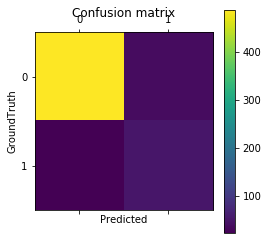

[[488  38]
 [ 23  51]]


In [39]:
conftable(y_test,y_pred,"conf")

In [45]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1-Score: ", metrics.f1_score(y_test, y_pred))

Accuracy:  0.8983333333333333
Precision:  0.5730337078651685
Recall:  0.6891891891891891
F1-Score:  0.6257668711656441


In [46]:
# Predicting the Test set results
for pred in clf:
    y_pred = pred.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("Precision: ", metrics.precision_score(y_test, y_pred))
    print("Recall: ", metrics.recall_score(y_test, y_pred))
    print("F1-Score: ", metrics.f1_score(y_test, y_pred))

Accuracy:  0.8633333333333333
Precision:  0.3888888888888889
Recall:  0.1891891891891892
F1-Score:  0.2545454545454546
Accuracy:  0.9516666666666667
Precision:  0.8813559322033898
Recall:  0.7027027027027027
F1-Score:  0.7819548872180451
Accuracy:  0.9483333333333334
Precision:  0.8771929824561403
Recall:  0.6756756756756757
F1-Score:  0.7633587786259542
Accuracy:  0.8983333333333333
Precision:  0.5730337078651685
Recall:  0.6891891891891891
F1-Score:  0.6257668711656441
